<a href="https://colab.research.google.com/github/jsblandon/mapbiomas_gee_py/blob/main/mapbiomas_gee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is adapted from the tutorial [Python + Google Earth Engine: How to clean MapBiomas LULC rasters for any shapefile in Brazil from Vinícius Hector](https://towardsdatascience.com/python-google-earth-engine-how-to-clean-mapbiomas-lulc-rasters-for-any-shapefile-in-brazil-05d13dcf2307) at Medium

# **Libraries installing**


In [64]:
%%capture

# GeoPandas-oriented API to OGR vector data sources, such as ESRI Shapefile,
# GeoPackage, and GeoJSON
!pip install pyogrio

# Python implementation of the R package janitor, and provides a clean API for
# cleaning data
!pip install pyjanitor

# Raster managing package installing
!pip install rioxarray

# EarthPy is a python package devoted to working with spatial and remote sensing
# data
!pip install earthpy

# **Libraries calls**

In [86]:
# Library importing
import ee
import geemap
import geopandas as gpd
import janitor
import numexpr                  # fast pd.query() manipulation
import numpy as np              # matrices-like data treatment
import matplotlib.pyplot as plt # plot
import matplotlib.colors as colors  # color manipulation
import matplotlib.patches as mpatches  # patch objects creation
import pandas as pd
import rasterio as rio          # raster managing
import rioxarray as rxr         # raster managing
from matplotlib.colors import ListedColormap, Normalize  # color manipulation

# Shapely Objects and Geometry Manipulation
from shapely.geometry import mapping, Polygon, Point, MultiPolygon, LineString

In [21]:
# Use numexpr for fast pd.query() manipulation
pd.set_option('compute.use_numexpr', True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# Google Earth Engine Authentication and initialization:
# Project field should correspond to an existing GEE project
project_name = 'here-comes-gee-project-name'
ee.Authenticate()
ee.Initialize(project=project_name)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Main code**

In [16]:
# Region of Interest (RoI) definition from a shapefile
path = '/path/to/shape/storage/at/google/drive'
roi = gpd.read_file(path, engine='pyogrio', use_arrow=True)
roi = roi.clean_names()
roi = roi.to_crs(4326)
roi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,decodigo,denombre,dearea,denorma,shape_leng,shape_area,geometry
0,00,Area en Litigio Cauca - Huila,342.099087,Límite por Acuerdo Gobernadores Informe 1982,1.093000e+05,3.420991e+08,"POLYGON ((-76.34465 2.40313, -76.34158 2.40306..."
1,17,Caldas,7422.208349,Ley No.17 de 1905,7.359800e+05,7.422208e+09,"POLYGON ((-74.68056 5.77916, -74.67986 5.77905..."
2,18,Caquetá,92709.074851,Constitución Política de Colombia 1991,2.352172e+06,9.270907e+10,"POLYGON ((-74.79916 2.93792, -74.79542 2.93417..."
3,25,Cundinamarca,23963.653733,Constitución Política de Colombia 1886,1.167148e+06,2.396365e+10,"POLYGON ((-74.32755 5.82396, -74.32716 5.82375..."
4,41,Huila,18137.066737,Ley No. 46 de 1905,1.145831e+06,1.813707e+10,"POLYGON ((-74.51853 3.83600, -74.51750 3.83592..."
5,50,Meta,82662.114630,Ley No. 118 de 1959,2.014355e+06,8.266211e+10,"POLYGON ((-71.07793 4.89910, -71.07762 4.72658..."
6,63,Quindío,1933.200385,Ley No. 2 de 1966,2.831072e+05,1.933200e+09,"POLYGON ((-75.70194 4.72049, -75.70180 4.72045..."
7,66,Risaralda,3556.507527,Ley No. 70 de 1966,5.360005e+05,3.556508e+09,"POLYGON ((-76.00825 5.56368, -76.00765 5.56293..."
8,68,Santander,30512.329363,Constitución Política de Colombia 1886,1.312332e+06,3.051233e+10,"POLYGON ((-73.77429 8.10825, -73.77413 8.10762..."
9,73,Tolima,24128.077595,Constitución Política de Colombia 1886,1.056554e+06,2.412808e+10,"POLYGON ((-74.82173 5.31671, -74.82156 5.31653..."


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


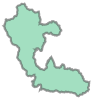

In [24]:
# If the shapefile contains multiple polygons, it is recommended to set to an
# specific one
sta_roi = roi.query("denombre == 'Risaralda'")
sta_roi = sta_roi.geometry.iloc[0]
sta_roi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


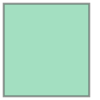

In [46]:
# Get the bounding box from the RoI
bbox = sta_roi.bounds
bbox = Polygon([(bbox[0], bbox[1]), (bbox[0], bbox[3]), (bbox[2], bbox[3]), (bbox[2], bbox[1])])

bbox_xmin = bbox.bounds[0] # Get the minimum x coordinate of the bounding box
bbox_ymin = bbox.bounds[1] # Get the minimum y coordinate of the bounding box
bbox_xmax = bbox.bounds[2] # Get the maximum x coordinate of the bounding box
bbox_ymax = bbox.bounds[3] # Get the maximum y coordinate of the bounding box

bbox # See bbox around selected shape

In [35]:
# Define the MapBiomas Collection asset, in this case we use Colombia
mapbiomas_asset = 'projects/mapbiomas-raisg/MAPBIOMAS-COLOMBIA/COLECCION1/INTEGRACION/integracion-pais/Integracion-COLOMBIA-3'
asset_properties = ee.data.getAsset(mapbiomas_asset)
asset_properties

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'type': 'IMAGE',
 'name': 'projects/earthengine-legacy/assets/projects/mapbiomas-raisg/MAPBIOMAS-COLOMBIA/COLECCION1/INTEGRACION/integracion-pais/Integracion-COLOMBIA-3',
 'id': 'projects/mapbiomas-raisg/MAPBIOMAS-COLOMBIA/COLECCION1/INTEGRACION/integracion-pais/Integracion-COLOMBIA-3',
 'properties': {'descripcion': 'filtro frecuencia general',
  'code_region': 30406,
  'paso': 'P07',
  'version': 3,
  'pais': 'COLOMBIA'},
 'updateTime': '2023-09-20T14:14:25.691315Z',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-88.22190260398155, 21.36970817397722],
    [-88.22188417373195, -6.055408940190116],
    [-87.62876182799094, -6.057664717387897],
    [-87.03563523390137, -6.059276166862931],
    [-86.44250580654337, -6.060243112060335],
    [-85.84937496220977, -6.060565447068736],
    [-85.25624411785822, -6.060243136566376],
    [-84.66311469041037, -6.0592762158660305],
    [-84.06998809618604, -6.057664790888053],
    [-83.4768657502564, -6.055409038169364],
    [-83.002393591

In [47]:
# Filter to a given collection
year = 2022
band_id = f'classification_{year}'

mapbiomas_image = ee.Image(mapbiomas_asset)
mapbiomas2022 = mapbiomas_image.select(band_id)

# Set the RoI to the bbox around the selected shape
sta_roi = ee.Geometry.Rectangle([bbox_xmin, bbox_ymin, bbox_xmax, bbox_ymax])
image_roi = mapbiomas2022.clip(sta_roi)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
# Exporting task preparation
export_task = ee.batch.Export.image.toDrive(
    image=image_roi, # Image to export to Google Drive as a GeoTIFF
    description='clipped_mapbiomas_ris_2022', # Task description
    folder='mapbiomas_co_ris', # Change this to the folder in your Google Drive where you want to save the file
    fileNamePrefix='mapbiomas_ris_2022', # File name (change it if you want to)
    region= sta_roi.getInfo()['coordinates'], # Region to export the image
    scale=30,
    fileFormat='GeoTIFF'
)

# Start the export task
export_task.start()

In [60]:
# It is plotted the raster example
Map = geemap.Map()
Map.addLayer(image_roi, {}, "MapBiomas Colombia 2022")
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [66]:
# Loading the save image as raster
path = '/google/drive/folder/archive.tif'
raster_ris = rxr.open_rasterio(path, masked = True).squeeze()

In [77]:
# MapBiomas unique categories
unique_values = np.unique(raster_ris)
unique_values

array([ 0.,  3.,  9., 13., 21., 24., 25., 27., 29., 30., 33., 34.],
      dtype=float32)

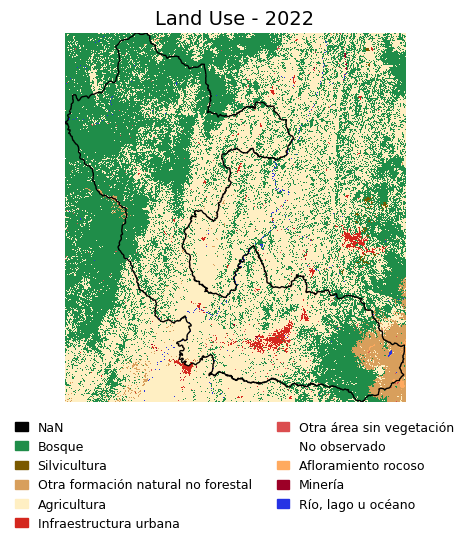

In [107]:
# Plotting the results
fig, axis = plt.subplots(nrows=1, ncols=1, )

values = [ 0., 3., 9., 13., 21., 24., 25., 27., 29., 30., 33., 34.]
colors_list = ['#000000', '#1f8d49', '#7a5900', '#d89f5c', '#ffefc3', '#d4271e',
               '#db4d4f', '#FFFFFF', '#ffaa5f', '#9c0027', '#2532e4', '#93dfe6']
labels = ['NaN', 'Bosque', 'Silvicultura', 'Otra formación natural no forestal',
          'Agricultura', 'Infraestructura urbana', 'Otra área sin vegetación',
          'No observado', 'Afloramiento rocoso', 'Minería', 'Río, lago u océano',
          'Glaciar']

cmap = colors.ListedColormap(colors_list) # Create a colormap (cmap) with the colors
bounds = values + [256] # Add a value to the end of the list to include the last color
norm = colors.BoundaryNorm(bounds, cmap.N) # Normalize the colormap to the values

raster_ris.plot.imshow(ax=axis,cmap=cmap, norm=norm, add_colorbar=False)
roi.query("denombre == 'Risaralda'").plot(ax=axis, facecolor="none", edgecolor='black')

# Legend
legend_patches = [mpatches.Patch(color=colors_list[i], label=labels[i]) for i in range(len(values)-1)]

# Create the legend
plt.legend(handles = legend_patches, bbox_to_anchor = (0.5, -0.02), loc = 'upper center',
          ncol = 2, fontsize = 9, handlelength=1, frameon=False)

plt.axis('off')
plt.title('Land Use - 2022', fontsize=14)

plt.show()